In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataCar.zip # Décompresser votre base de données à partir du Drive

Archive:  /content/drive/MyDrive/dataCar.zip
   creating: data/
   creating: data/TRAIN/
   creating: data/TRAIN/Mercedes/
  inflating: data/TRAIN/Mercedes/Mercedes0.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes1.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes10.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes11.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes12.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes13.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes14.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes2.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes3.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes4.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes5.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes6.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes7.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes8.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes9.jpg  
   creating: data/TRAIN/Peugeot/
  inflating: data/TRAIN/Peugeot/Peugeot0.jpg  
  inflating: data/TRAIN/Peugeot/Peugeot1.jpg  
  inflatin

In [ ]:
import os
print('total Validation Mercedes images:', len(os.listdir('/content/data/VAL/Mercedes')))
print('total Validation Toyota images:', len(os.listdir('/content/data/VAL/Toyota')))
print('total Validation Peugeot images:', len(os.listdir('/content/data/VAL/Peugeot')))
print('total Training Mercedes images:', len(os.listdir('/content/data/TRAIN/Mercedes')))
print('total Training Toyota images:', len(os.listdir('/content/data/TRAIN/Toyota')))
print('total Training Peugeot images:', len(os.listdir('/content/data/TRAIN/Peugeot')))

total Validation Mercedes images: 5
total Validation Toyota images: 5
total Validation Peugeot images: 5
total Training Mercedes images: 15
total Training Toyota images: 15
total Training Peugeot images: 15


In [ ]:
train_dir = '/content/drive/MyDrive/data/TRAIN'
validation_dir = '/content/drive/MyDrive/data/VAL'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      147520    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   zoom_range=0.8,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=2,
    class_mode='categorical') #categorical
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=2,
    class_mode='categorical') #categorical

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
callbacks_list = [early]
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # categorical_crossentropy
history=model.fit(train_generator,epochs=50, validation_data=validation_generator,callbacks=callbacks_list)# callbacks=callbacks_lis

Epoch 1/50
23/23 [==============================] - 24s 545ms/step - loss: 6.6871 - accuracy: 0.3333 - val_loss: 5.0223 - val_accuracy: 0.3333
Epoch 2/50
23/23 [==============================] - 1s 48ms/step - loss: 3.6107 - accuracy: 0.3333 - val_loss: 2.2168 - val_accuracy: 0.3333
Epoch 3/50
23/23 [==============================] - 2s 67ms/step - loss: 1.4957 - accuracy: 0.2667 - val_loss: 1.1645 - val_accuracy: 0.3333
Epoch 4/50
23/23 [==============================] - 2s 66ms/step - loss: 1.1765 - accuracy: 0.2889 - val_loss: 1.1075 - val_accuracy: 0.3333
Epoch 5/50
23/23 [==============================] - 1s 56ms/step - loss: 1.1120 - accuracy: 0.2444 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 6/50
23/23 [==============================] - 1s 40ms/step - loss: 1.1217 - accuracy: 0.2222 - val_loss: 1.1038 - val_accuracy: 0.3333
Epoch 7/50
23/23 [==============================] - 1s 39ms/step - loss: 1.1200 - accuracy: 0.3778 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 8/50


In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/drive/MyDrive/data/VAL/Mercedes/Mercedes16.jpg'

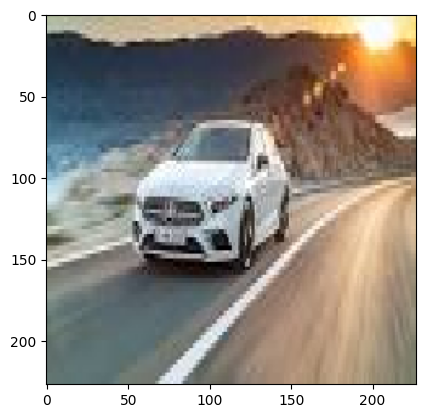

1/1 [==============================] - 0s 96ms/step


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)


In [ ]:
print(score)

[[0.37279177 0.31772965 0.30947864]]


In [ ]:
l=list(score)
classe=np.argmax(l)
classe

2

In [ ]:
if classe==0:
  print("mercedes")
elif classe==1:
  print("peugeot")
else:
  print("toyota")

toyota
